In [14]:
y_pred

array([0.01158103])

In [8]:
# SVR

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [ ]:

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1)) 
y = y.flatten(order='C')


In [4]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', gamma = 'auto')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
# Predicting a new result
#y_pred = regressor.predict([[6.5]])
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
y_pred = sc_y.inverse_transform(y_pred)

ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (10,)

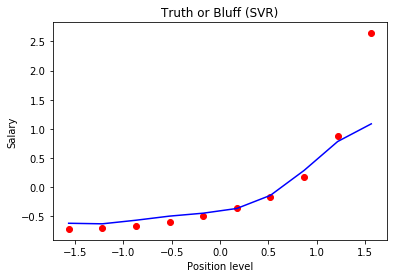

In [6]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [ ]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()